In [3]:
import os
import cv2
import numpy as np
import pandas as pd

In [4]:
train_path = r"D:\DS Projects\AI-MoodMate\data\raw\fer2013_images\train"
test_path = r"D:\DS Projects\AI-MoodMate\data\raw\fer2013_images\test"
music_path = r"D:\DS Projects\AI-MoodMate\data\raw\music_dataset\Music Info.csv"

In [5]:
classes = sorted(os.listdir(train_path))
print("Emotion classes:", classes)

Emotion classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [6]:
for emotion in classes:
    num_images = len(os.listdir(os.path.join(train_path, emotion)))
    print(f"{emotion}: {num_images} images")

angry: 3995 images
disgust: 436 images
fear: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprise: 3171 images


In [7]:
X_train, y_train = [], []

for idx, emotion in enumerate(classes):
    emotion_path = os.path.join(train_path, emotion)
    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = img / 255.0
        X_train.append(img.reshape(48,48,1))
        y_train.append(idx)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("Train data shape:", X_train.shape, y_train.shape)

Train data shape: (28709, 48, 48, 1) (28709,)


In [8]:
X_test, y_test = [], []

for idx, emotion in enumerate(classes):
    emotion_path = os.path.join(test_path, emotion)
    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = img / 255.0
        X_test.append(img.reshape(48,48,1))
        y_test.append(idx)

X_test = np.array(X_test)
y_test = np.array(y_test)
print("Test data shape:", X_test.shape, y_test.shape)

Test data shape: (7178, 48, 48, 1) (7178,)


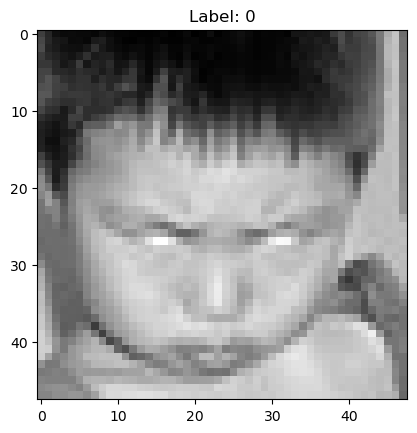

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(48,48), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [10]:
music = pd.read_csv(music_path)
print("Music dataset shape:", music.shape)
music.head()

Music dataset shape: (50683, 21)


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [16]:
# "data" folder madhe direct save kara (processed folder nahiye)
music_features = music[['track_id', 'name', 'artist', 'genre', 'year']]
music_features.to_csv("music_features.csv", index=False)  # ← "data" madhe direct

music_features.head()

,track_id,name,artist,genre,year
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,NaN,2004
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,NaN,2006
2,TROUVHL128F426C441,Come as You Are,Nirvana,RnB,1991
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,NaN,2004
4,TRLNZBD128F935E4D8,Creep,Radiohead,RnB,2008


In [17]:
emotion_to_music = {
    0: ["sad", "acoustic", "calm"],
    1: ["happy", "pop", "dance"],
    2: ["angry", "rock", "metal"],
    3: ["neutral", "instrumental"],
    4: ["fear", "ambient"],
    5: ["surprise", "electronic"],
    6: ["disgust", "dark", "grunge"]
}
print("Emotion to music mapping:", emotion_to_music)

Emotion to music mapping: {0: ['sad', 'acoustic', 'calm'], 1: ['happy', 'pop', 'dance'], 2: ['angry', 'rock', 'metal'], 3: ['neutral', 'instrumental'], 4: ['fear', 'ambient'], 5: ['surprise', 'electronic'], 6: ['disgust', 'dark', 'grunge']}


In [20]:

np.save("data/X_train.npy", X_train)
np.save("data/y_train.npy", y_train) 
np.save("data/X_test.npy", X_test)
np.save("data/y_test.npy", y_test)
music_features.to_csv("data/music_features.csv", index=False)

print("All data saved to data/ folder")

FileNotFoundError: [Errno 2] No such file or directory: 'data/X_train.npy'

In [22]:

current_dir = os.getcwd()
data_dir = os.path.join(current_dir, "data")
os.makedirs(data_dir, exist_ok=True)

print(f"Data directory created at: {data_dir}")

np.save(os.path.join(data_dir, "X_train.npy"), X_train)
np.save(os.path.join(data_dir, "y_train.npy"), y_train)
np.save(os.path.join(data_dir, "X_test.npy"), X_test)
np.save(os.path.join(data_dir, "y_test.npy"), y_test)
music_features.to_csv(os.path.join(data_dir, "music_features.csv"), index=False)

print("All data saved successfully!")

Data directory created at: d:\DS Projects\AI-MoodMate\notebooks\data
All data saved successfully!


All data saved to data/ folder
